In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("clean_df.csv")

# MODEL CREATION

In [3]:
X = df.drop("binaryClass", axis=1)
y = df["binaryClass"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [6]:
model = Sequential()
model.add(Dense(256, input_shape=[X.shape[1]], activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation="sigmoid"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

In [7]:
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [8]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20)

In [9]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[es], batch_size=64, 
                    validation_data=(X_test,y_test))

Epoch 1/100
45/45 [==============================] - 1s 12ms/step - loss: 0.3604 - accuracy: 0.8660 - val_loss: 0.2283 - val_accuracy: 0.9311
Epoch 2/100
45/45 [==============================] - 0s 8ms/step - loss: 0.2407 - accuracy: 0.9201 - val_loss: 0.1879 - val_accuracy: 0.9321
Epoch 3/100
45/45 [==============================] - 0s 11ms/step - loss: 0.1981 - accuracy: 0.9290 - val_loss: 0.1529 - val_accuracy: 0.9502
Epoch 4/100
45/45 [==============================] - 0s 8ms/step - loss: 0.1728 - accuracy: 0.9431 - val_loss: 0.1360 - val_accuracy: 0.9533
Epoch 5/100
45/45 [==============================] - 0s 6ms/step - loss: 0.1550 - accuracy: 0.9502 - val_loss: 0.1195 - val_accuracy: 0.9576
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.1362 - accuracy: 0.9540 - val_loss: 0.1059 - val_accuracy: 0.9597
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.1260 - accuracy: 0.9586 - val_loss: 0.0874 - val_accuracy: 0.9671
Epoch 8/100

# MODEL EVALUATION

In [10]:
model.evaluate(X_train, y_train)

89/89 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.9968


[0.009906191378831863, 0.9968186616897583]

In [11]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9894


[0.05100071057677269, 0.9893955588340759]

In [12]:
losses = pd.DataFrame(history.history)

<AxesSubplot:>

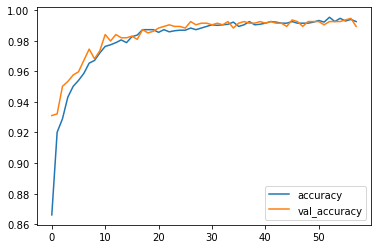

In [13]:
losses[["accuracy", "val_accuracy"]].plot()

<AxesSubplot:>

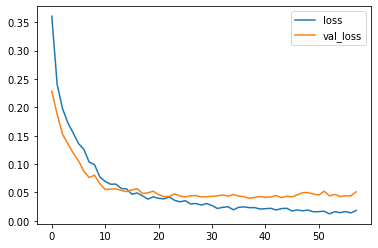

In [14]:
losses[["loss", "val_loss"]].plot()

In [15]:
pred = (model.predict(X_test) > 0.5).astype('int32')

In [16]:
pd.DataFrame(data = confusion_matrix(y_true = y_test
                                     , y_pred = pred))

,0,1
0,56,9
1,1,877


In [17]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92        65
           1       0.99      1.00      0.99       878

    accuracy                           0.99       943
   macro avg       0.99      0.93      0.96       943
weighted avg       0.99      0.99      0.99       943

